In [76]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from geopy.geocoders import Nominatim

In [77]:
df = pd.read_csv('Food_Establishment_Inspection_Data.csv')
df.columns = df.columns.str.replace(' ', '_')

/var/folders/t4/bptgh3hx6bz480z9tyq5f9780000gn/T/ipykernel_92223/1350672283.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Food_Establishment_Inspection_Data.csv')


In [78]:
df.isna().sum()

Name                               0
Program_Identifier                 0
Inspection_Date                  774
Description                        0
Address                            0
City                               0
Zip_Code                           0
Phone                          71193
Longitude                        330
Latitude                         330
Inspection_Business_Name         774
Inspection_Type                  774
Inspection_Score                 815
Inspection_Result                774
Inspection_Closed_Business       774
Violation_Type                111478
Violation_Description         111478
Violation_Points                   0
Business_ID                        0
Inspection_Serial_Num            774
Violation_Record_ID           111478
Grade                          59513
dtype: int64

In [79]:
#Dropping unusable columns and save to df2
df=df.drop(['Program_Identifier','Address','Phone','Violation_Record_ID','Zip_Code','Inspection_Business_Name','Inspection_Serial_Num'],axis='columns')
df.head(3)

,Name,Inspection_Date,Description,City,Longitude,Latitude,Inspection_Type,Inspection_Score,Inspection_Result,Inspection_Closed_Business,Violation_Type,Violation_Description,Violation_Points,Business_ID,Grade
0,#807 TUTTA BELLA,08/31/2022,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,BLUE,"3200 - Insects, rodents, animals not present; ...",5,PR0089260,1.0
1,#807 TUTTA BELLA,08/31/2022,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,RED,0200 - Food Worker Cards current for all food ...,5,PR0089260,1.0
2,#807 TUTTA BELLA,01/13/2022,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,0.0,Satisfactory,False,NaN,NaN,0,PR0089260,1.0


In [80]:
geolocator = Nominatim(user_agent="name")
def City_longitude(city):
    location = geolocator.geocode(city)
    return location.longitude
def City_latitude(city):
    location = geolocator.geocode(city)
    return location.latitude

In [81]:
df["Longitude"].fillna(City_longitude(df["City"].values),inplace=True)
df["Latitude"].fillna(City_latitude(df["City"].values),inplace=True)

In [82]:
df.isna().sum()

Name                               0
Inspection_Date                  774
Description                        0
City                               0
Longitude                          0
Latitude                           0
Inspection_Type                  774
Inspection_Score                 815
Inspection_Result                774
Inspection_Closed_Business       774
Violation_Type                111478
Violation_Description         111478
Violation_Points                   0
Business_ID                        0
Grade                          59513
dtype: int64

In [83]:
df = df.dropna( how='all',subset= ['Inspection_Date'])

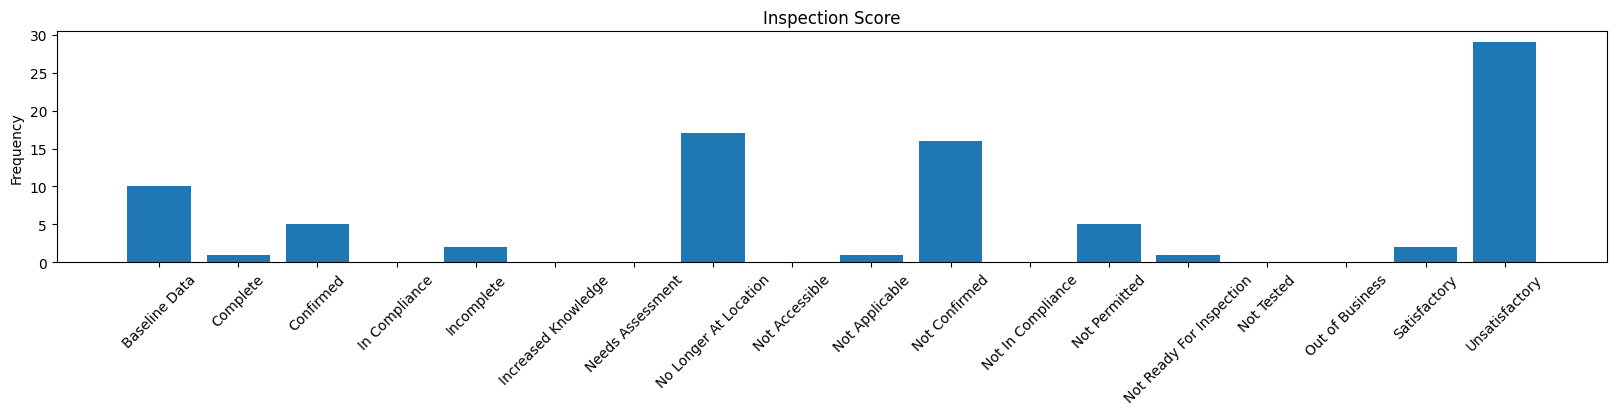

In [84]:
df_mean=np.round(df.groupby(['Inspection_Result']).agg({'Inspection_Score':'mean'}))
feature_data = df_mean.index
feature_count=df_mean['Inspection_Score']
plt.figure(figsize = (20,3))
plt.bar(feature_data,feature_count)
plt.xticks(feature_count.index, feature_count.index.values,rotation=45)
plt.ylabel("Frequency")
plt.title('Inspection Score')
plt.show()


In [85]:
df.loc[:,('Inspection_Score')] =np.round( df.groupby(['Inspection_Result'], group_keys=False)['Inspection_Score']
                     .apply(lambda x: x.fillna(x.mean())))

In [86]:
df.loc[:,('Violation_Type')] =df['Violation_Type'].fillna("Green")

In [87]:
df['Violation_Description'] = df['Violation_Description'].fillna("No_violation")

In [88]:
df.loc[:,('Grade')] =np.round( df.groupby(['Inspection_Score'], group_keys=False)['Grade']
                     .apply(lambda x: x.fillna(x.mean())))

In [89]:
df.isna().sum()

Name                          0
Inspection_Date               0
Description                   0
City                          0
Longitude                     0
Latitude                      0
Inspection_Type               0
Inspection_Score              0
Inspection_Result             0
Inspection_Closed_Business    0
Violation_Type                0
Violation_Description         0
Violation_Points              0
Business_ID                   0
Grade                         0
dtype: int64

<AxesSubplot: >

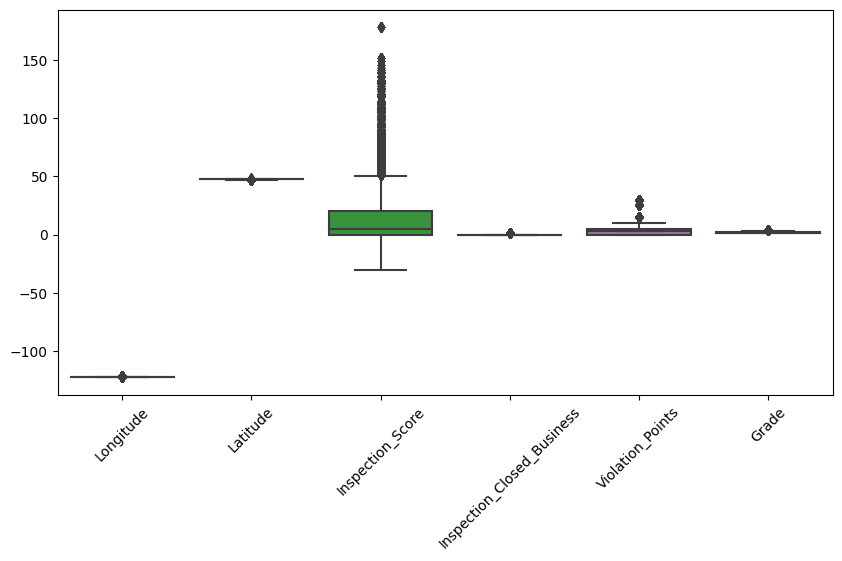

In [90]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.boxplot(data=df)

In [91]:
df.describe()

,Longitude,Latitude,Inspection_Score,Violation_Points,Grade
count,249804.000000,249804.000000,249804.000000,249804.000000,249804.000000
mean,-122.256275,47.563756,14.147752,4.424861,1.311688
std,0.113753,0.128777,20.287694,6.165551,0.539006
min,-122.518749,47.155934,-30.000000,0.000000,1.000000
25%,-122.333593,47.478803,0.000000,0.000000,1.000000
50%,-122.299547,47.604297,5.000000,3.000000,1.000000
75%,-122.197881,47.661558,20.000000,5.000000,2.000000
max,-121.090900,48.415296,178.000000,30.000000,4.000000


In [92]:
df['Inspection_Date'] = pd.to_datetime(df['Inspection_Date'])
df.head()

,Name,Inspection_Date,Description,City,Longitude,Latitude,Inspection_Type,Inspection_Score,Inspection_Result,Inspection_Closed_Business,Violation_Type,Violation_Description,Violation_Points,Business_ID,Grade
0,#807 TUTTA BELLA,2022-08-31,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,BLUE,"3200 - Insects, rodents, animals not present; ...",5,PR0089260,1.0
1,#807 TUTTA BELLA,2022-08-31,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,RED,0200 - Food Worker Cards current for all food ...,5,PR0089260,1.0
2,#807 TUTTA BELLA,2022-01-13,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,0.0,Satisfactory,False,Green,No_violation,0,PR0089260,1.0
3,#807 TUTTA BELLA,2021-01-06,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,0.0,Satisfactory,False,Green,No_violation,0,PR0089260,1.0
4,+MAS CAFE,2022-07-13,Seating 0-12 - Risk Category III,SEATTLE,-122.334587,47.648180,Return Inspection,0.0,Satisfactory,False,Green,No_violation,0,PR0046367,2.0


In [93]:
df['Year'] = pd.DatetimeIndex(df['Inspection_Date']).year
df['Month'] = pd.DatetimeIndex(df['Inspection_Date']).month
df['day_of_week'] = df['Inspection_Date'].dt.day_name()
df.head()

,Name,Inspection_Date,Description,City,Longitude,Latitude,Inspection_Type,Inspection_Score,Inspection_Result,Inspection_Closed_Business,Violation_Type,Violation_Description,Violation_Points,Business_ID,Grade,Year,Month,day_of_week
0,#807 TUTTA BELLA,2022-08-31,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,BLUE,"3200 - Insects, rodents, animals not present; ...",5,PR0089260,1.0,2022,8,Wednesday
1,#807 TUTTA BELLA,2022-08-31,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,RED,0200 - Food Worker Cards current for all food ...,5,PR0089260,1.0,2022,8,Wednesday
2,#807 TUTTA BELLA,2022-01-13,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,0.0,Satisfactory,False,Green,No_violation,0,PR0089260,1.0,2022,1,Thursday
3,#807 TUTTA BELLA,2021-01-06,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,0.0,Satisfactory,False,Green,No_violation,0,PR0089260,1.0,2021,1,Wednesday
4,+MAS CAFE,2022-07-13,Seating 0-12 - Risk Category III,SEATTLE,-122.334587,47.648180,Return Inspection,0.0,Satisfactory,False,Green,No_violation,0,PR0046367,2.0,2022,7,Wednesday


In [94]:
def find_season(month, hemisphere):
    if hemisphere == 'Southern':
        season_month_south = {
            12:'Summer', 1:'Summer', 2:'Summer',
            3:'Autumn', 4:'Autumn', 5:'Autumn',
            6:'Winter', 7:'Winter', 8:'Winter',
            9:'Spring', 10:'Spring', 11:'Spring'}
        return season_month_south.get(month)
        
    elif hemisphere == 'Northern':
        season_month_north = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Autumn', 10:'Autumn', 11:'Autumn'}
        return season_month_north.get(month)
    else:
        print('Invalid selection. Please select a hemisphere and try again')

In [95]:
season_list = []
hemisphere = 'Northern'
for month in df['Month']:
    season = find_season(month, hemisphere)
    season_list.append(season)
    
df['Season'] = season_list
df.head()

,Name,Inspection_Date,Description,City,Longitude,Latitude,Inspection_Type,Inspection_Score,Inspection_Result,Inspection_Closed_Business,Violation_Type,Violation_Description,Violation_Points,Business_ID,Grade,Year,Month,day_of_week,Season
0,#807 TUTTA BELLA,2022-08-31,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,BLUE,"3200 - Insects, rodents, animals not present; ...",5,PR0089260,1.0,2022,8,Wednesday,Summer
1,#807 TUTTA BELLA,2022-08-31,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,RED,0200 - Food Worker Cards current for all food ...,5,PR0089260,1.0,2022,8,Wednesday,Summer
2,#807 TUTTA BELLA,2022-01-13,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,0.0,Satisfactory,False,Green,No_violation,0,PR0089260,1.0,2022,1,Thursday,Winter
3,#807 TUTTA BELLA,2021-01-06,Seating 0-12 - Risk Category III,SEATTLE,-122.296415,47.662311,Routine Inspection/Field Review,0.0,Satisfactory,False,Green,No_violation,0,PR0089260,1.0,2021,1,Wednesday,Winter
4,+MAS CAFE,2022-07-13,Seating 0-12 - Risk Category III,SEATTLE,-122.334587,47.648180,Return Inspection,0.0,Satisfactory,False,Green,No_violation,0,PR0046367,2.0,2022,7,Wednesday,Summer


In [96]:
data=df.to_csv('Clean_Data.csv')